## Initial Stenosis model comparision experiments
### Notes:
**For all models apart from YOLO I used the StenUNet (https://arxiv.org/pdf/2310.14961) preprocessing method, the StenUNet augmentations, and to compare the impact of StenUNet's post processing algorithm, I ran each model with and without post-processing.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("sten_exp_scores.csv", index_col='Model')
data

,Preprocessing,Augmentations,Postprocessing,Jaccard,F1,Recall,Precision,Acc,F2,HD,MFPS
Model,,,,,,,,,,,
ResUNet++,StenUNet,StenUNet,NaN,0.2516,0.3572,0.4339,0.3720,0.9851,0.3938,3.8237,168.528
ResUNet++ (PostProc),StenUNet,StenUNet,StenUNet,0.2519,0.3674,0.4334,0.3800,0.9851,0.3936,3.8279,NaN
DeepLabV3ResNet101,StenUNet,StenUNet,NaN,0.4335,0.5758,0.6052,0.6404,0.9920,0.5824,3.5716,96.739
DeepLabV3ResNet101 (PostProc),StenUNet,StenUNet,StenUNet,0.4337,0.5759,0.6049,0.6458,0.9921,0.5822,3.5748,NaN
Attention UNet,StenUNet,StenUNet,NaN,0.4213,0.5617,0.6338,0.5877,0.9912,0.5903,3.4762,233.800
Attention UNet (PostProc),StenUNet,StenUNet,StenUNet,0.4218,0.5616,0.6329,0.5917,0.9913,0.5898,3.4793,NaN
YOLOv8x-seg,StenUNet,YOLO,NaN,0.3234,0.4244,0.4315,0.7354,0.9914,0.4205,4.0100,44.643
YOLOv8x-seg (PostProc),StenUNet,YOLO,StenUNet,0.3163,0.4183,0.4124,0.7452,0.9915,0.4075,3.9999,NaN
TransUNet,StenUNet,StenUNet,NaN,0.0433,0.0741,0.1014,0.5846,0.9839,0.0827,4.5840,140.153


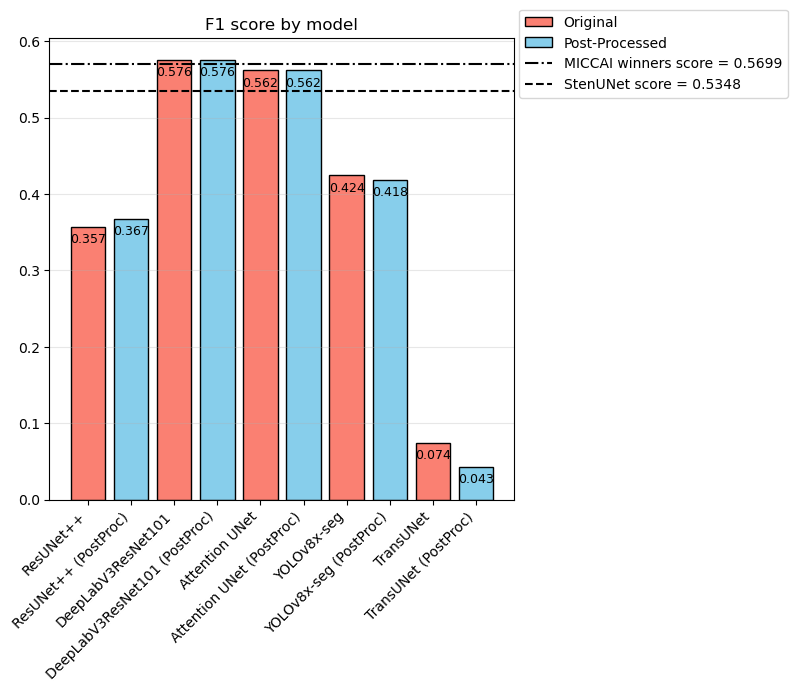

In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_var(data):
    fig, ax = plt.subplots(figsize=(6,6)) # Add figure size for clarity

    colors = ['skyblue' if '(PostProc)' in str(label) else 'salmon' for label in data.index]
    ax.bar(data.index, data['F1'], color=colors, edgecolor='black')

    ax.axhline(y=0.5699, color='black', linestyle='dashdot', label='MICCAI winners score = 0.5699')
    ax.axhline(y=0.5348, color='black', linestyle='dashed', label='StenUNet score = 0.5348')

    ax.set(title='F1 score by model')
    ax.grid(True, axis='y', alpha=0.3)

    for i, v in enumerate(data['F1']):
        ax.text(i, v-0.025, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

    color_legend = [
        Patch(facecolor='salmon', edgecolor='black', label='Original'),
        Patch(facecolor='skyblue', edgecolor='black', label='Post-Processed'),
    ]

    # Combine all legend handles
    handles, labels = ax.get_legend_handles_labels()
    handles = color_legend + handles  # Color key first
    ax.legend(handles=handles, loc=(1.01,0.87))
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_var(data)

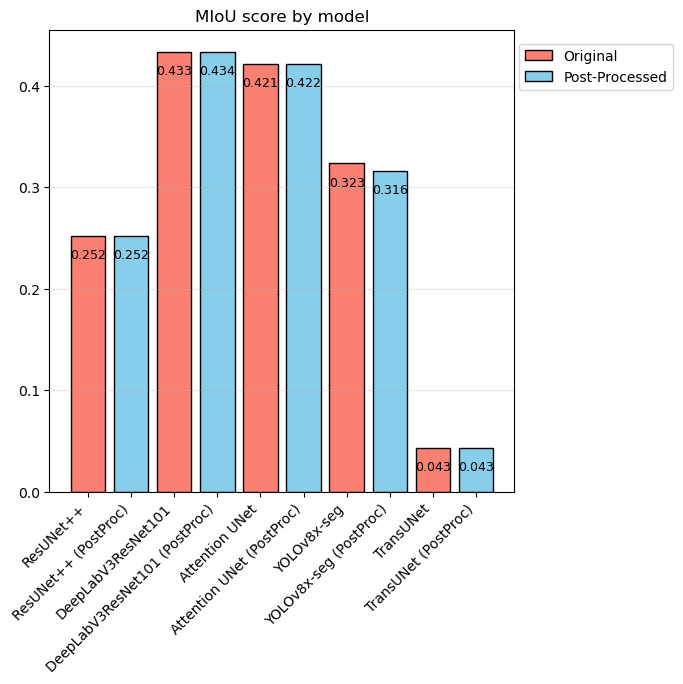

In [4]:
fig, ax = plt.subplots(figsize=(6,6)) # Add figure size for clarity

colors = ['skyblue' if '(PostProc)' in str(label) else 'salmon' for label in data.index]
ax.bar(data.index, data['Jaccard'], color=colors, edgecolor='black')

ax.set(title='MIoU score by model')
ax.grid(True, axis='y', alpha=0.3)

for i, v in enumerate(data['Jaccard']):
    ax.text(i, v-0.025, f"{v:.3f}", ha='center', va='bottom', fontsize=9)

color_legend = [
    Patch(facecolor='salmon', edgecolor='black', label='Original'),
    Patch(facecolor='skyblue', edgecolor='black', label='Post-Processed'),
]

# Combine all legend handles
handles, labels = ax.get_legend_handles_labels()
handles = color_legend + handles  # Color key first
ax.legend(handles=handles, loc=(1.01,0.87))
plt.xticks(rotation=45, ha='right')
plt.show()

## Comments
- StenUnet's post processing algorithm only improved results for ResUNet++. It actually reduced the scores for YOLOv8 and TransUNet. This may or may not be due to the threshold chosen
- TransUNet underperformed. I think this is due to the model oversegmenting, and getting distracted by the entire vessel overall rather than just the area of stenosis.
- DeepLabV3ResNet101 (in built torch model) actually managed to **just** beat the MICCAI winners by 0.007
- AttentionUNet beat the StenUNet score but not the MICCAI winners.

## Next steps
- Quick experiment with post processing threshold
- Experiment with different optimisers? They all used Adam, apart from YOLO which I left as auto and transunet as sgd
- Add my own block to one of the models to try and improve - maybe add a residual block/s to Attention UNet

# Optimiser results

In [5]:
opt_data = pd.read_csv('optimiser_scores.csv')
opt_data

,Model,Optimiser,Jaccard,F1,Recall,Precision,Acc,F2,HD,MFPS,MSPF
0,deeplabv3resnet101,RMSprop,0.4361,0.5795,0.6535,0.6015,0.9915,0.6087,3.4558,241.859821,0.000014
1,deeplabv3resnet101,RMSprop,0.4364,0.5797,0.6532,0.6022,0.9915,0.6087,3.4569,241.859821,0.000014
2,deeplabv3resnet101,adam,0.4335,0.5758,0.6053,0.6402,0.9920,0.5824,3.5714,234.683708,0.000014
3,deeplabv3resnet101,adam,0.4337,0.5758,0.6050,0.6457,0.9921,0.5823,3.5750,234.683708,0.000014
4,deeplabv3resnet101,SGD,0.3401,0.4735,0.5984,0.4890,0.9886,0.5255,3.7720,245.597627,0.000014
5,deeplabv3resnet101,SGD,0.3399,0.4730,0.5977,0.4953,0.9886,0.5250,3.7743,245.597627,0.000014
6,attentionunet,RMSprop,0.3864,0.5269,0.5925,0.5548,0.9906,0.5527,3.5288,472.811087,0.000007
7,attentionunet,RMSprop,0.3873,0.5276,0.5919,0.5583,0.9907,0.5528,3.5322,472.811087,0.000007
8,attentionunet,adam,0.4214,0.5618,0.6339,0.5879,0.9912,0.5904,3.4743,498.900611,0.000007
9,attentionunet,adam,0.4221,0.5620,0.6331,0.5930,0.9913,0.5901,3.4774,498.900611,0.000007


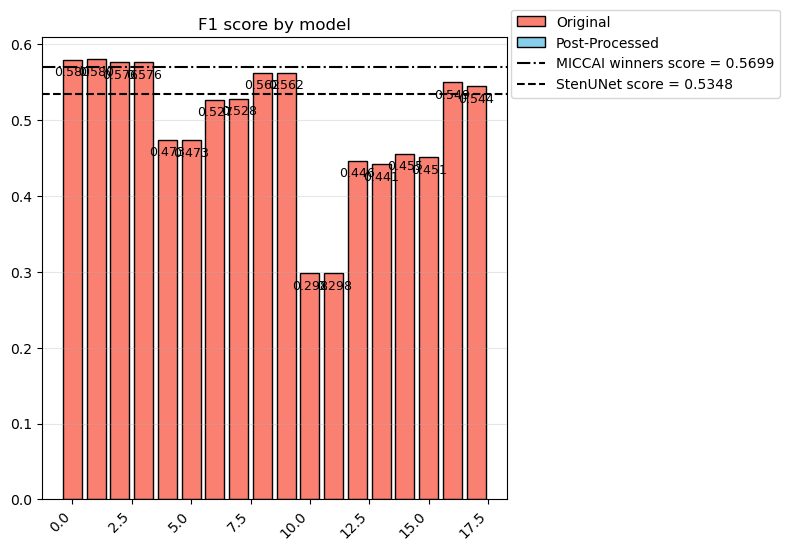

In [17]:
plot_var(opt_data)

## Best optimisers for top three models
 - DLV3RN101 = RMSprop
 - AUN = Adam
 - Yolo = SGD

In [29]:
import torchvision
import torch
from torch import nn
from torchinfo import summary

model = torchvision.models.segmentation.deeplabv3_resnet101(weights='DEFAULT', progress=True, aux_loss=None)
model.classifier[4] = nn.Conv2d(256, 1, kernel_size=1)

summary(model, (1,3,256,256))

Layer (type:depth-idx)                             Output Shape              Param #
DeepLabV3                                          [1, 21, 256, 256]         --
├─IntermediateLayerGetter: 1-1                     [1, 2048, 32, 32]         --
│    └─Conv2d: 2-1                                 [1, 64, 128, 128]         9,408
│    └─BatchNorm2d: 2-2                            [1, 64, 128, 128]         128
│    └─ReLU: 2-3                                   [1, 64, 128, 128]         --
│    └─MaxPool2d: 2-4                              [1, 64, 64, 64]           --
│    └─Sequential: 2-5                             [1, 256, 64, 64]          --
│    │    └─Bottleneck: 3-1                        [1, 256, 64, 64]          75,008
│    │    └─Bottleneck: 3-2                        [1, 256, 64, 64]          70,400
│    │    └─Bottleneck: 3-3                        [1, 256, 64, 64]          70,400
│    └─Sequential: 2-6                             [1, 512, 32, 32]          --
│    │    └─Bottlen